데이터 준비하기

In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib as mpl
import matplotlib.font_manager as fm

In [2]:
# 한글 깨짐 방지
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [4]:
df_patient = pandas.read_csv('PatientInfo.csv')

In [ ]:
df_patient

In [6]:
df_patient.tail()

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
3383,7000000009,9651.0,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,14.0,NaN,2020-03-29,NaN,NaN,isolated
3384,7000000010,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18.0,NaN,2020-04-03,NaN,NaN,isolated
3385,7000000011,NaN,male,NaN,30s,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7.000000e+09,5.0,NaN,2020-04-03,NaN,NaN,isolated
3386,7000000012,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9.0,NaN,2020-04-03,NaN,NaN,isolated
3387,7000000013,NaN,female,NaN,10s,China,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,6.0,NaN,2020-04-14,NaN,NaN,isolated


In [7]:
df_patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3388 entries, 0 to 3387
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          3388 non-null   int64  
 1   global_num          2276 non-null   float64
 2   gender              3311 non-null   object 
 3   birth_year          2927 non-null   float64
 4   age                 3304 non-null   object 
 5   country             3388 non-null   object 
 6   province            3388 non-null   object 
 7   city                3309 non-null   object 
 8   disease             18 non-null     object 
 9   infection_case      2620 non-null   object 
 10  infection_order     31 non-null     float64
 11  infected_by         822 non-null    float64
 12  contact_number      643 non-null    float64
 13  symptom_onset_date  481 non-null    object 
 14  confirmed_date      3385 non-null   object 
 15  released_date       1327 non-null   object 
 16  deceas

데이터 결측치 확인

In [20]:
df_patient.isna().sum() # df_patient는 null이니? True를 sum

patient_id               0
global_num            1112
gender                  77
birth_year             461
age                     84
country                  0
province                 0
city                    79
disease               3370
infection_case         768
infection_order       3357
infected_by           2566
contact_number        2745
symptom_onset_date    2907
confirmed_date           3
released_date         2061
deceased_date         3326
state                    0
dtype: int64

나이 (age) -> 20s -> 23 정확하게 변경하자 -> 현재년도 - 태어난 년도<br> 
1. Null(Nan) 데이터를 처리 (Nan 계산 불가) -> 0으로 채우자<br>
2. 나이 계산시 0 보다 큰 값은 (현재년도 - 태어난 년도) 0보다 작으면 다시 Nan 채우기

In [17]:
df_patient['birth_year'] = df_patient.birth_year.fillna(0.0).astype(int) # 널을 0.0으로 채우고 int로 바꾼다.

In [19]:
# 0 보다 큰 값은 그대로 사용하고, 0인 값은 Nan으로 변환 -> 나이 계산 시 2021살 방지
df_patient['birth_year'] = df_patient['birth_year'].map(lambda val : val if val > 0 else numpy.nan)
                                                        # map은 for와 비슷하게 값을 하나씩 가져와서 뒤에 명령어를 실행하고 저장한다.
                                                        # lambda는 결과물을 리스트로 바꿔주는 함수
                                                        # numpy의 nan으로 변환하는 이유는 데이터셋을 맞추기 위해서
                                                        # age의 20s 같은 값을 어차피 쓸 수 없는 값이기 때문에 nan값으로 바꿔줘야
                                                        #                                    시각화할 때 오류가 나지 않는다.

In [23]:
df_patient['age'] = 2021 - df_patient['birth_year']
df_patient

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,57.0,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,34.0,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,57.0,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,30.0,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,29.0,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3383,7000000009,9651.0,female,NaN,NaN,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,14.0,NaN,2020-03-29,NaN,NaN,isolated
3384,7000000010,NaN,female,NaN,NaN,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18.0,NaN,2020-04-03,NaN,NaN,isolated
3385,7000000011,NaN,male,NaN,NaN,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7.000000e+09,5.0,NaN,2020-04-03,NaN,NaN,isolated
3386,7000000012,NaN,female,NaN,NaN,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9.0,NaN,2020-04-03,NaN,NaN,isolated


In [24]:
df_patient['state'].unique()

array(['released', 'isolated', 'deceased'], dtype=object)

In [51]:
patient = df_patient[:]

2. 격리해제자(released) 데이터

In [72]:
# 격리해제자 정보 담기
released_state = patient[patient.state == 'released']
released_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1886 entries, 0 to 3382
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          1886 non-null   int64  
 1   global_num          1220 non-null   float64
 2   gender              1867 non-null   object 
 3   birth_year          1606 non-null   float64
 4   age                 1606 non-null   float64
 5   country             1886 non-null   object 
 6   province            1886 non-null   object 
 7   city                1859 non-null   object 
 8   disease             0 non-null      object 
 9   infection_case      1328 non-null   object 
 10  infection_order     29 non-null     float64
 11  infected_by         361 non-null    float64
 12  contact_number      455 non-null    float64
 13  symptom_onset_date  284 non-null    object 
 14  confirmed_date      1886 non-null   object 
 15  released_date       1314 non-null   object 
 16  deceas

격리해제자들의 연령대 분석

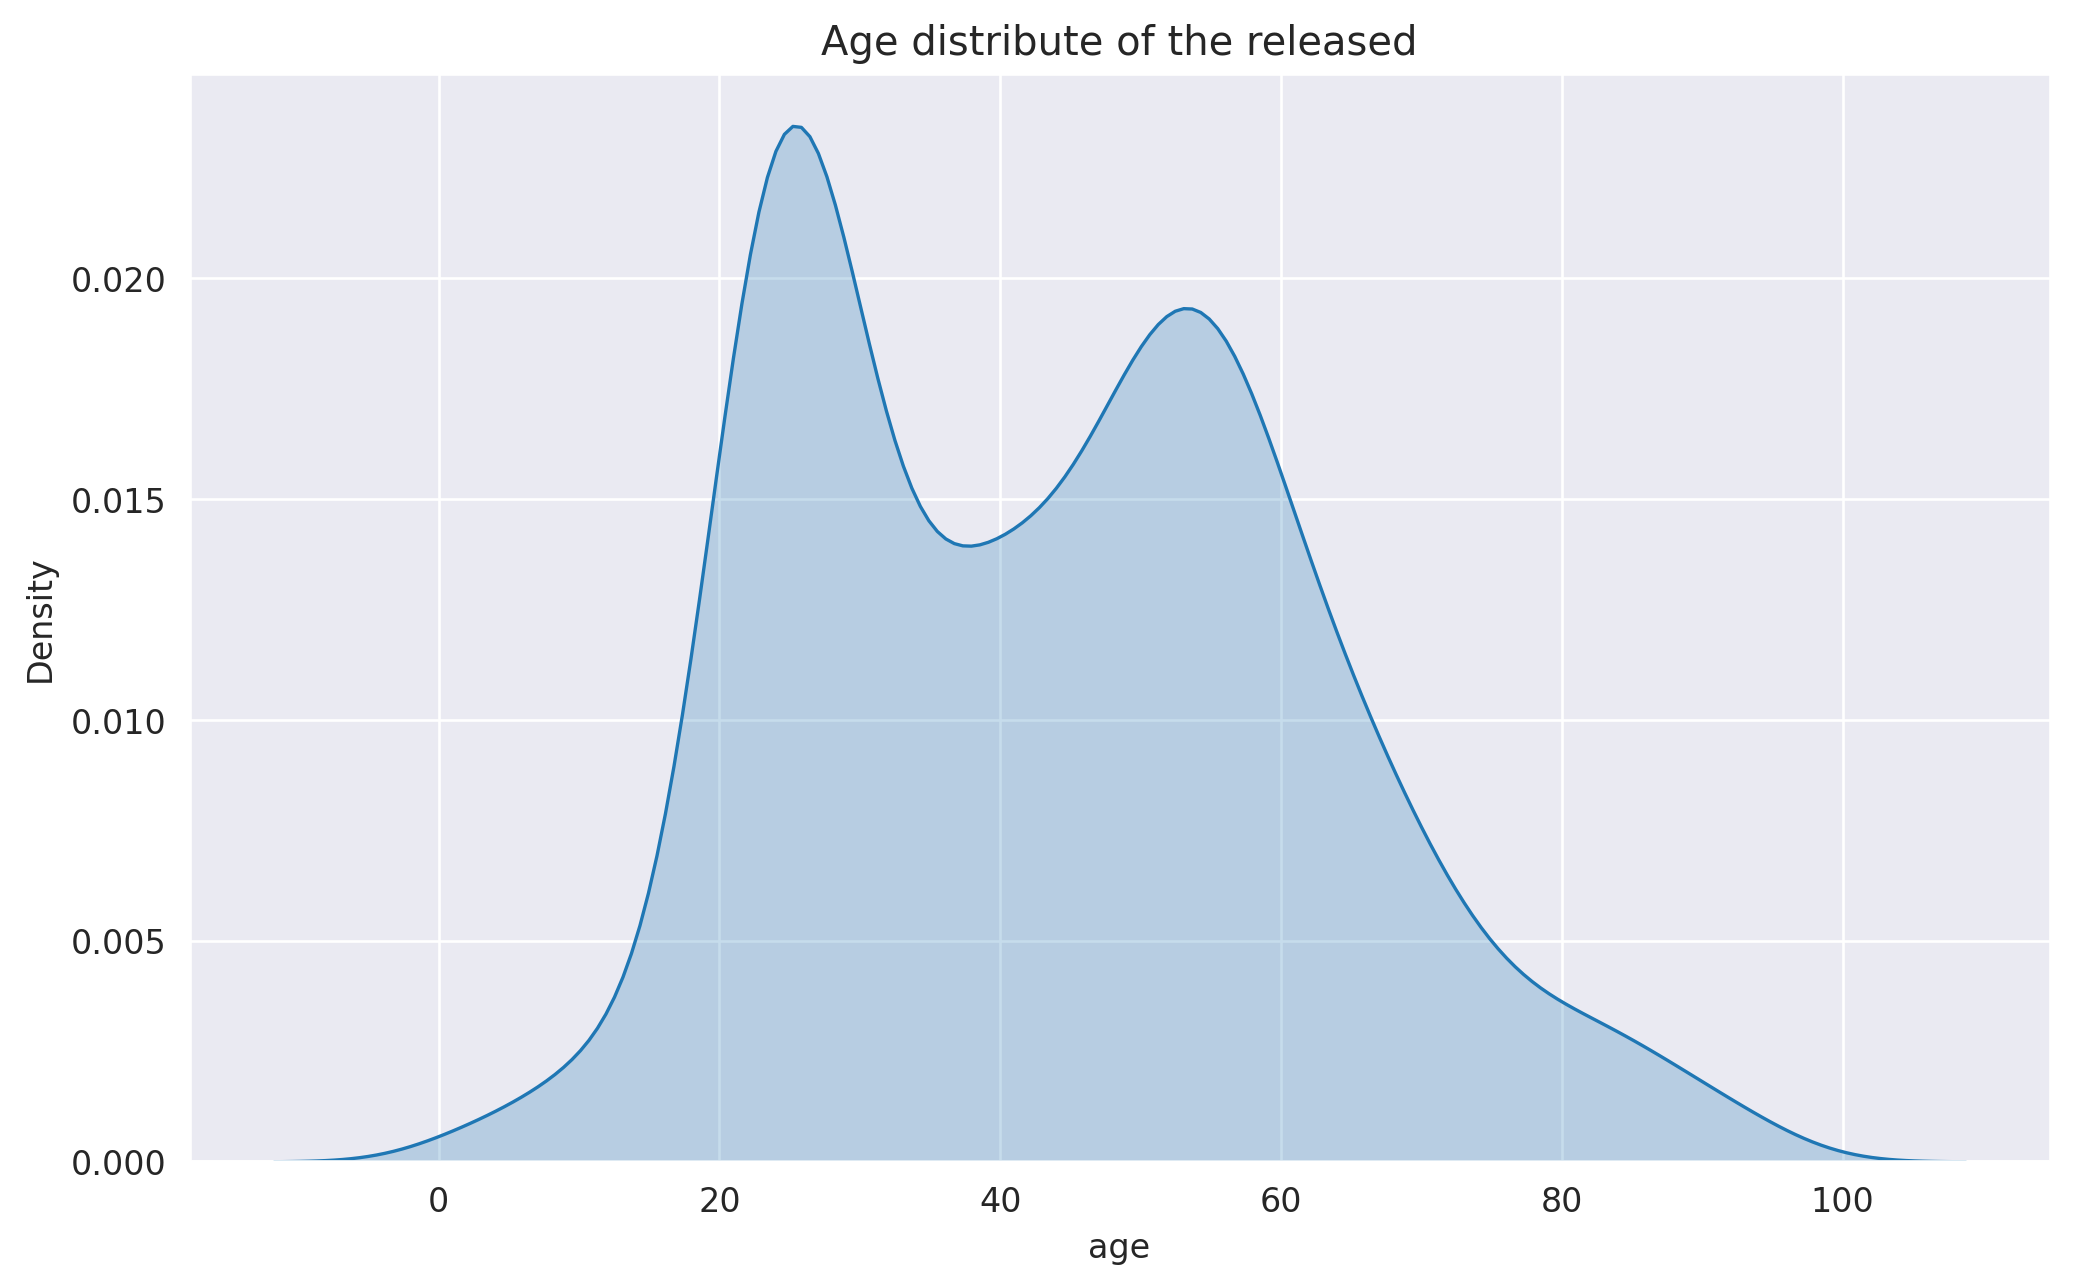

In [73]:
# 격리해제자들의 연령대 분포
plt.figure(figsize = (10, 6), dpi = 120)
sns.set_style('darkgrid')
plt.title('Age distribute of the released')
sns.kdeplot(data = released_state['age'], shade = True)

3. 격리된(isolated) 환자 데이터

In [38]:
# 격리된 환자의 정보 담기
isolated_state = patient[patient.state == 'isolated']
isolated_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1433 entries, 14 to 3387
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          1433 non-null   int64  
 1   global_num          997 non-null    float64
 2   gender              1375 non-null   object 
 3   birth_year          1257 non-null   float64
 4   age                 1257 non-null   float64
 5   country             1433 non-null   object 
 6   province            1433 non-null   object 
 7   city                1400 non-null   object 
 8   disease             0 non-null      object 
 9   infection_case      1263 non-null   object 
 10  infection_order     2 non-null      float64
 11  infected_by         461 non-null    float64
 12  contact_number      184 non-null    float64
 13  symptom_onset_date  191 non-null    object 
 14  confirmed_date      1430 non-null   object 
 15  released_date       11 non-null     object 
 16  decea

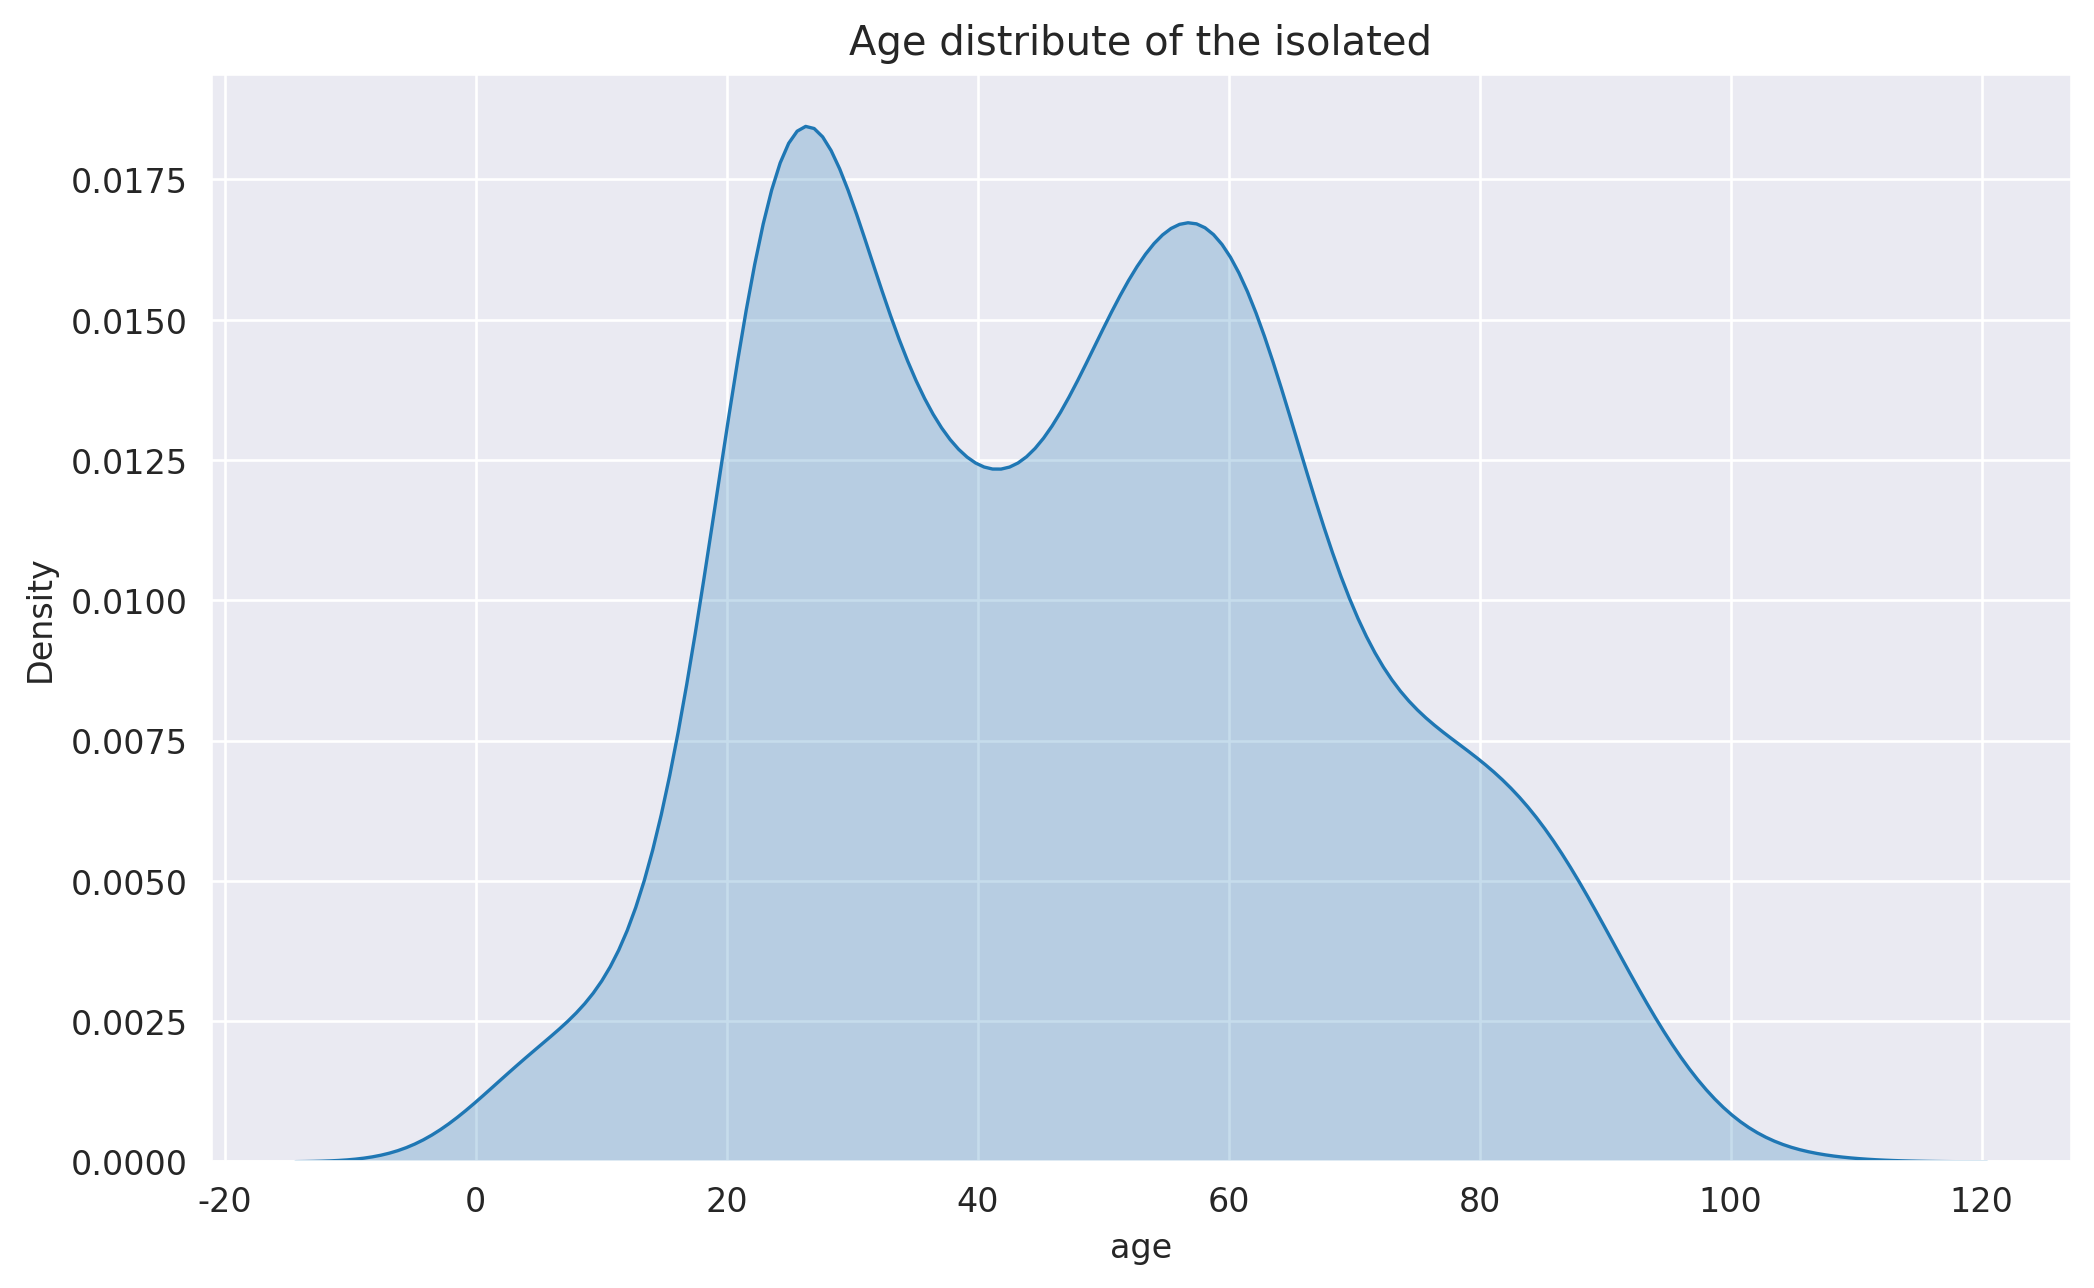

In [40]:
# 격리된 환자들의 연령대 분포
plt.figure(figsize = (10, 6), dpi = 120)
sns.set_style('darkgrid')
plt.title('Age distribute of the isolated')
sns.kdeplot(data = isolated_state['age'], shade = True)

4. 사망자(deceased) 데이터

In [42]:
# 사망자의 정보
dead_state = patient[patient.state=='deceased']
dead_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 108 to 3205
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          69 non-null     int64  
 1   global_num          59 non-null     float64
 2   gender              69 non-null     object 
 3   birth_year          64 non-null     float64
 4   age                 64 non-null     float64
 5   country             69 non-null     object 
 6   province            69 non-null     object 
 7   city                50 non-null     object 
 8   disease             18 non-null     object 
 9   infection_case      29 non-null     object 
 10  infection_order     0 non-null      float64
 11  infected_by         0 non-null      float64
 12  contact_number      4 non-null      float64
 13  symptom_onset_date  6 non-null      object 
 14  confirmed_date      69 non-null     object 
 15  released_date       2 non-null      object 
 16  deceas

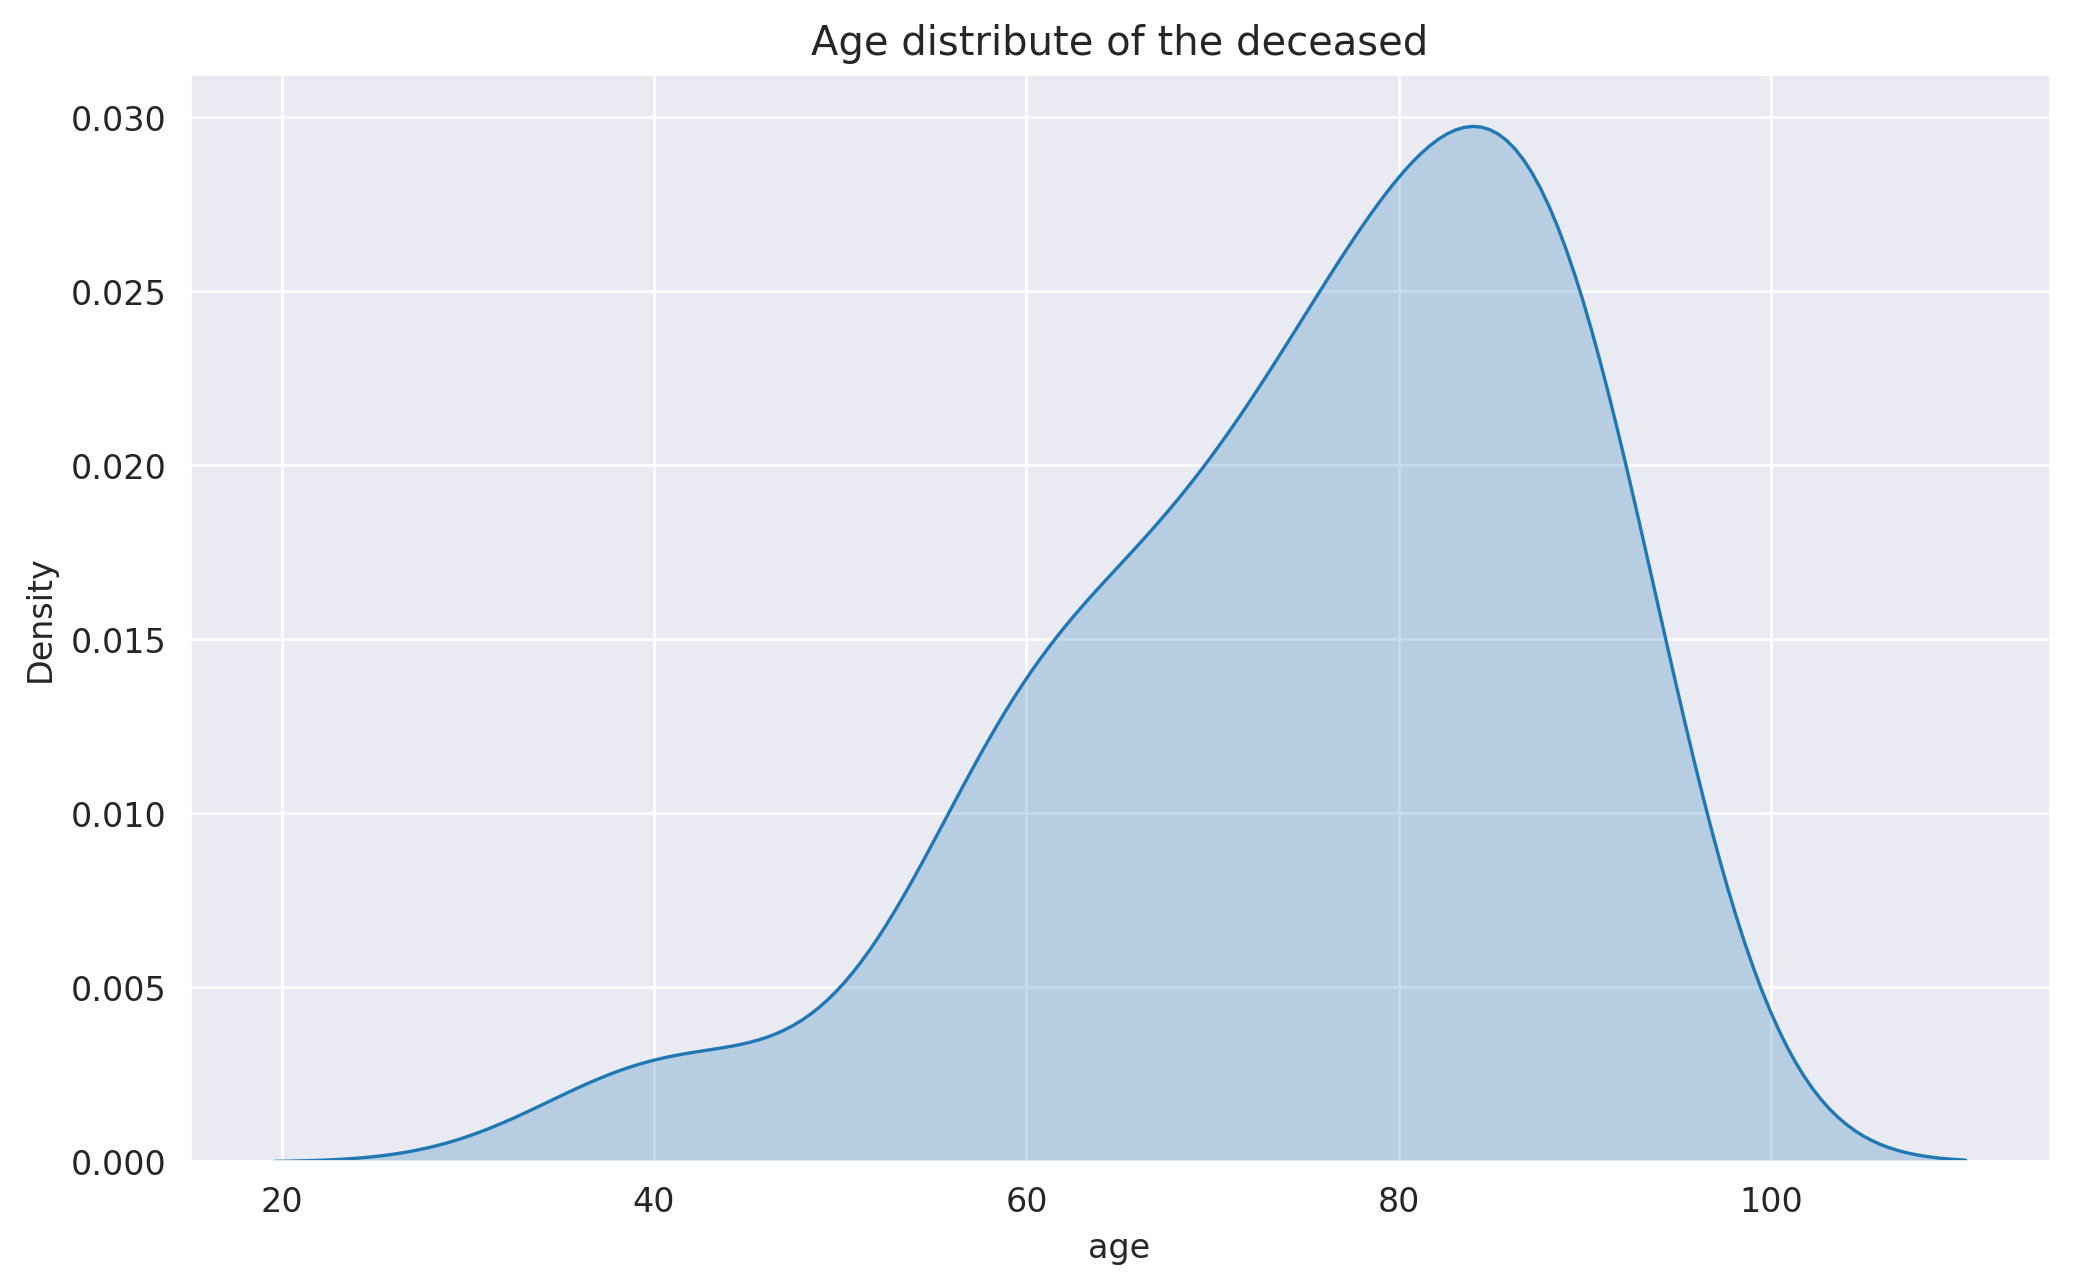

In [43]:
# 사망자들의 연령대 분포
plt.figure(figsize = (10, 6), dpi = 120)
sns.set_style('darkgrid')
plt.title('Age distribute of the deceased')
sns.kdeplot(data = dead_state['age'], shade = True)

In [52]:
# 성별별 test
dead_state = patient[patient.state=='deceased']
d = dead_state.groupby('gender').count()
d

,patient_id,global_num,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
gender,,,,,,,,,,,,,,,,,
female,25,20,22,25,25,25,19,5,9,0,0,2,1,25,2,23,25
male,44,39,42,44,44,44,31,13,20,0,0,2,5,44,0,39,44


In [53]:
male_dead = dead_state[dead_state.gender == 'male']
female_dead = dead_state[dead_state.gender == 'female']

In [57]:
female_dead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 727 to 3205
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          25 non-null     int64  
 1   global_num          20 non-null     float64
 2   gender              25 non-null     object 
 3   birth_year          22 non-null     float64
 4   age                 22 non-null     float64
 5   country             25 non-null     object 
 6   province            25 non-null     object 
 7   city                19 non-null     object 
 8   disease             5 non-null      object 
 9   infection_case      9 non-null      object 
 10  infection_order     0 non-null      float64
 11  infected_by         0 non-null      float64
 12  contact_number      2 non-null      float64
 13  symptom_onset_date  1 non-null      object 
 14  confirmed_date      25 non-null     object 
 15  released_date       2 non-null      object 
 16  deceas

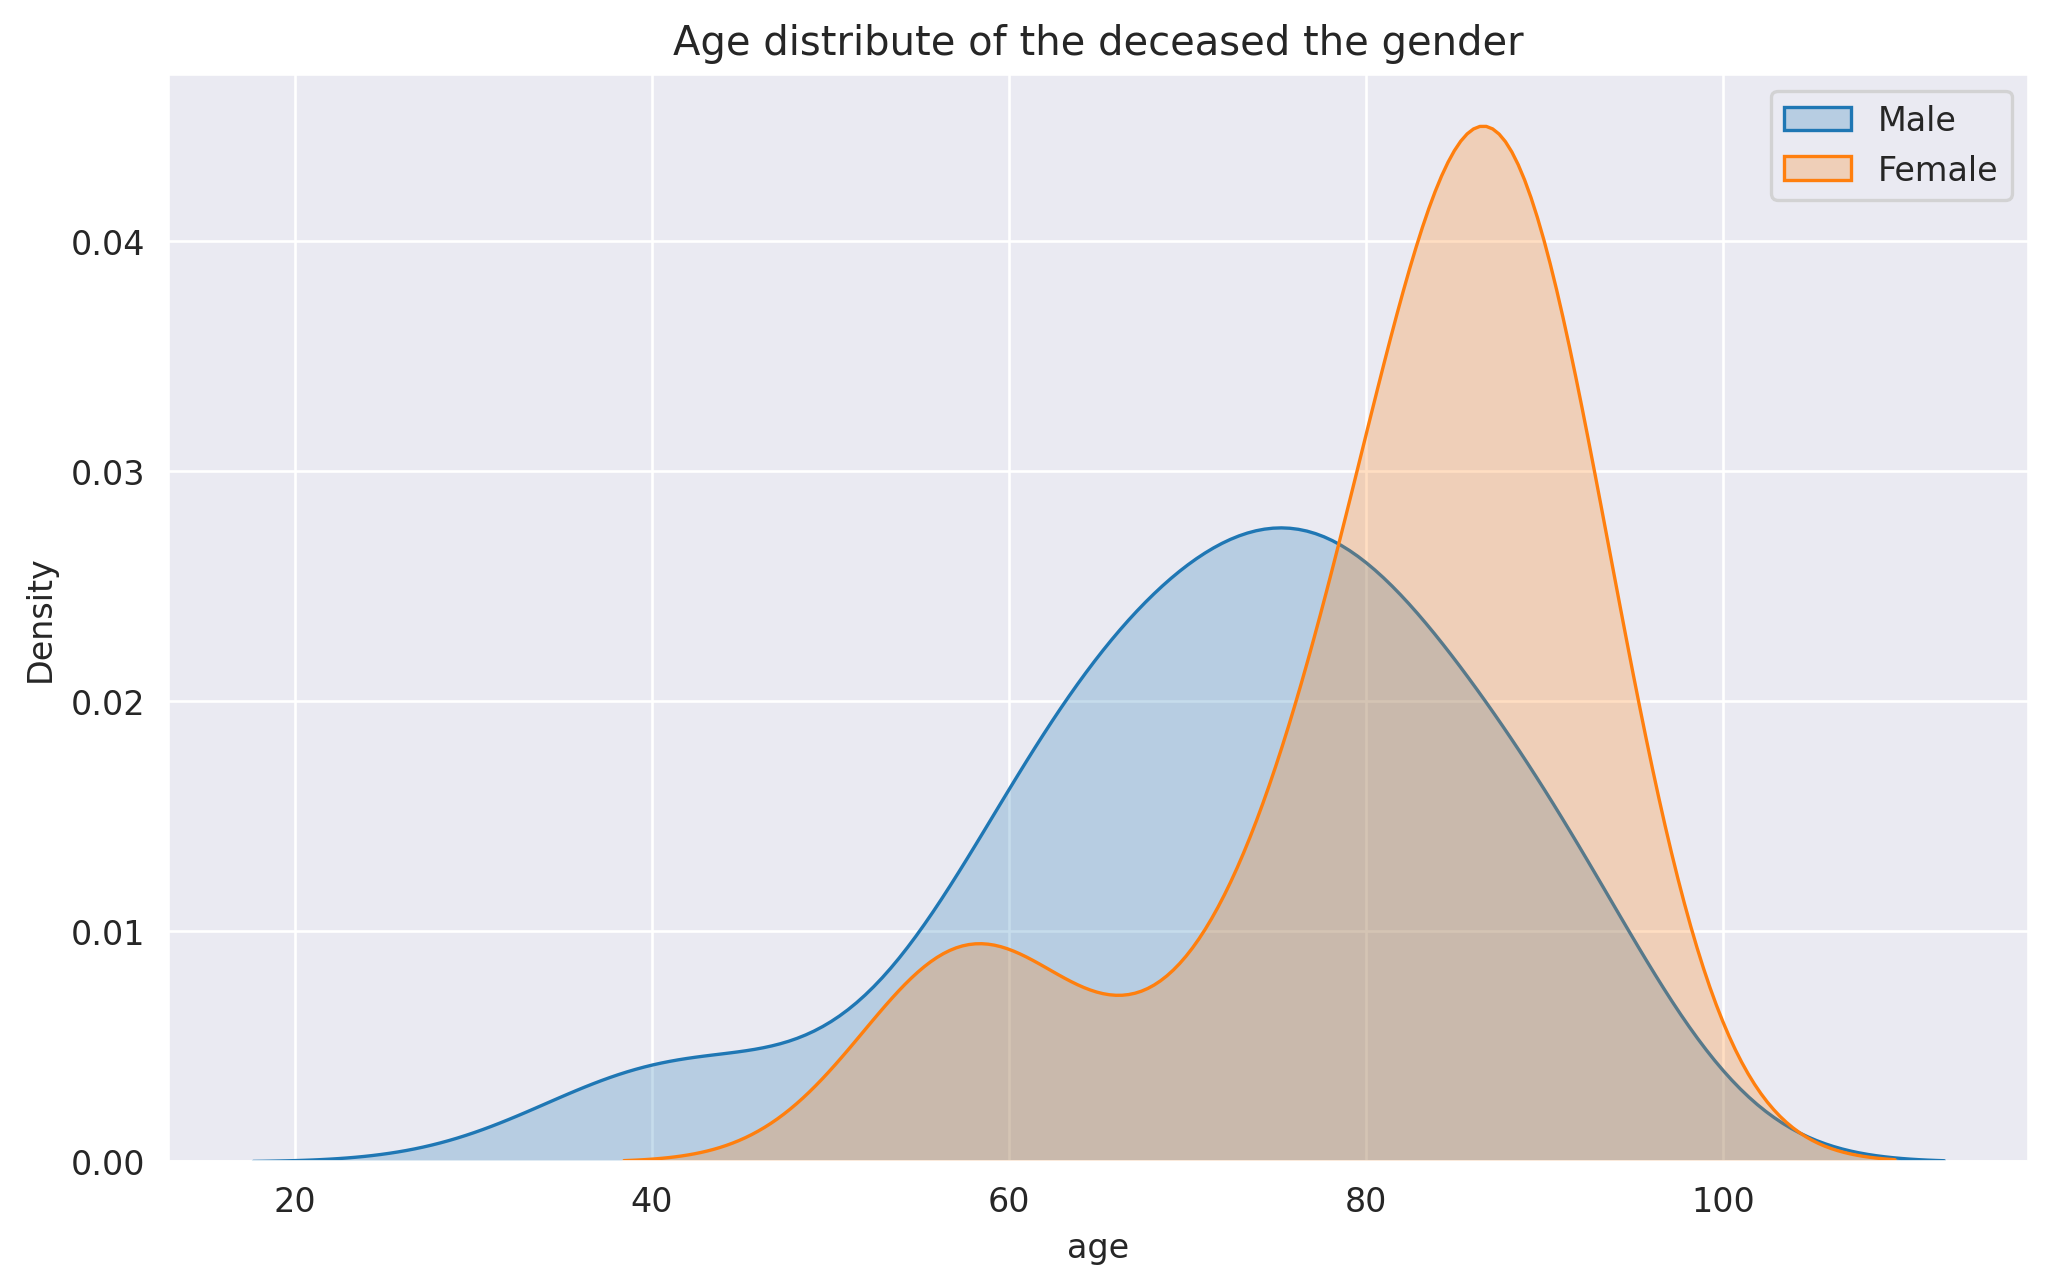

In [55]:
# 성별에 따른 사망자의 연령 분포
plt.figure(figsize = (10, 6), dpi = 120)
sns.set_style('darkgrid')
plt.title('Age distribute of the deceased the gender')
sns.kdeplot(data = male_dead['age'], label = 'Male', shade = True)
sns.kdeplot(data = female_dead['age'], label = 'Female', shade = True)
plt.legend()

KDE:Kernel Density Estimator 추가한 kdeplot()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


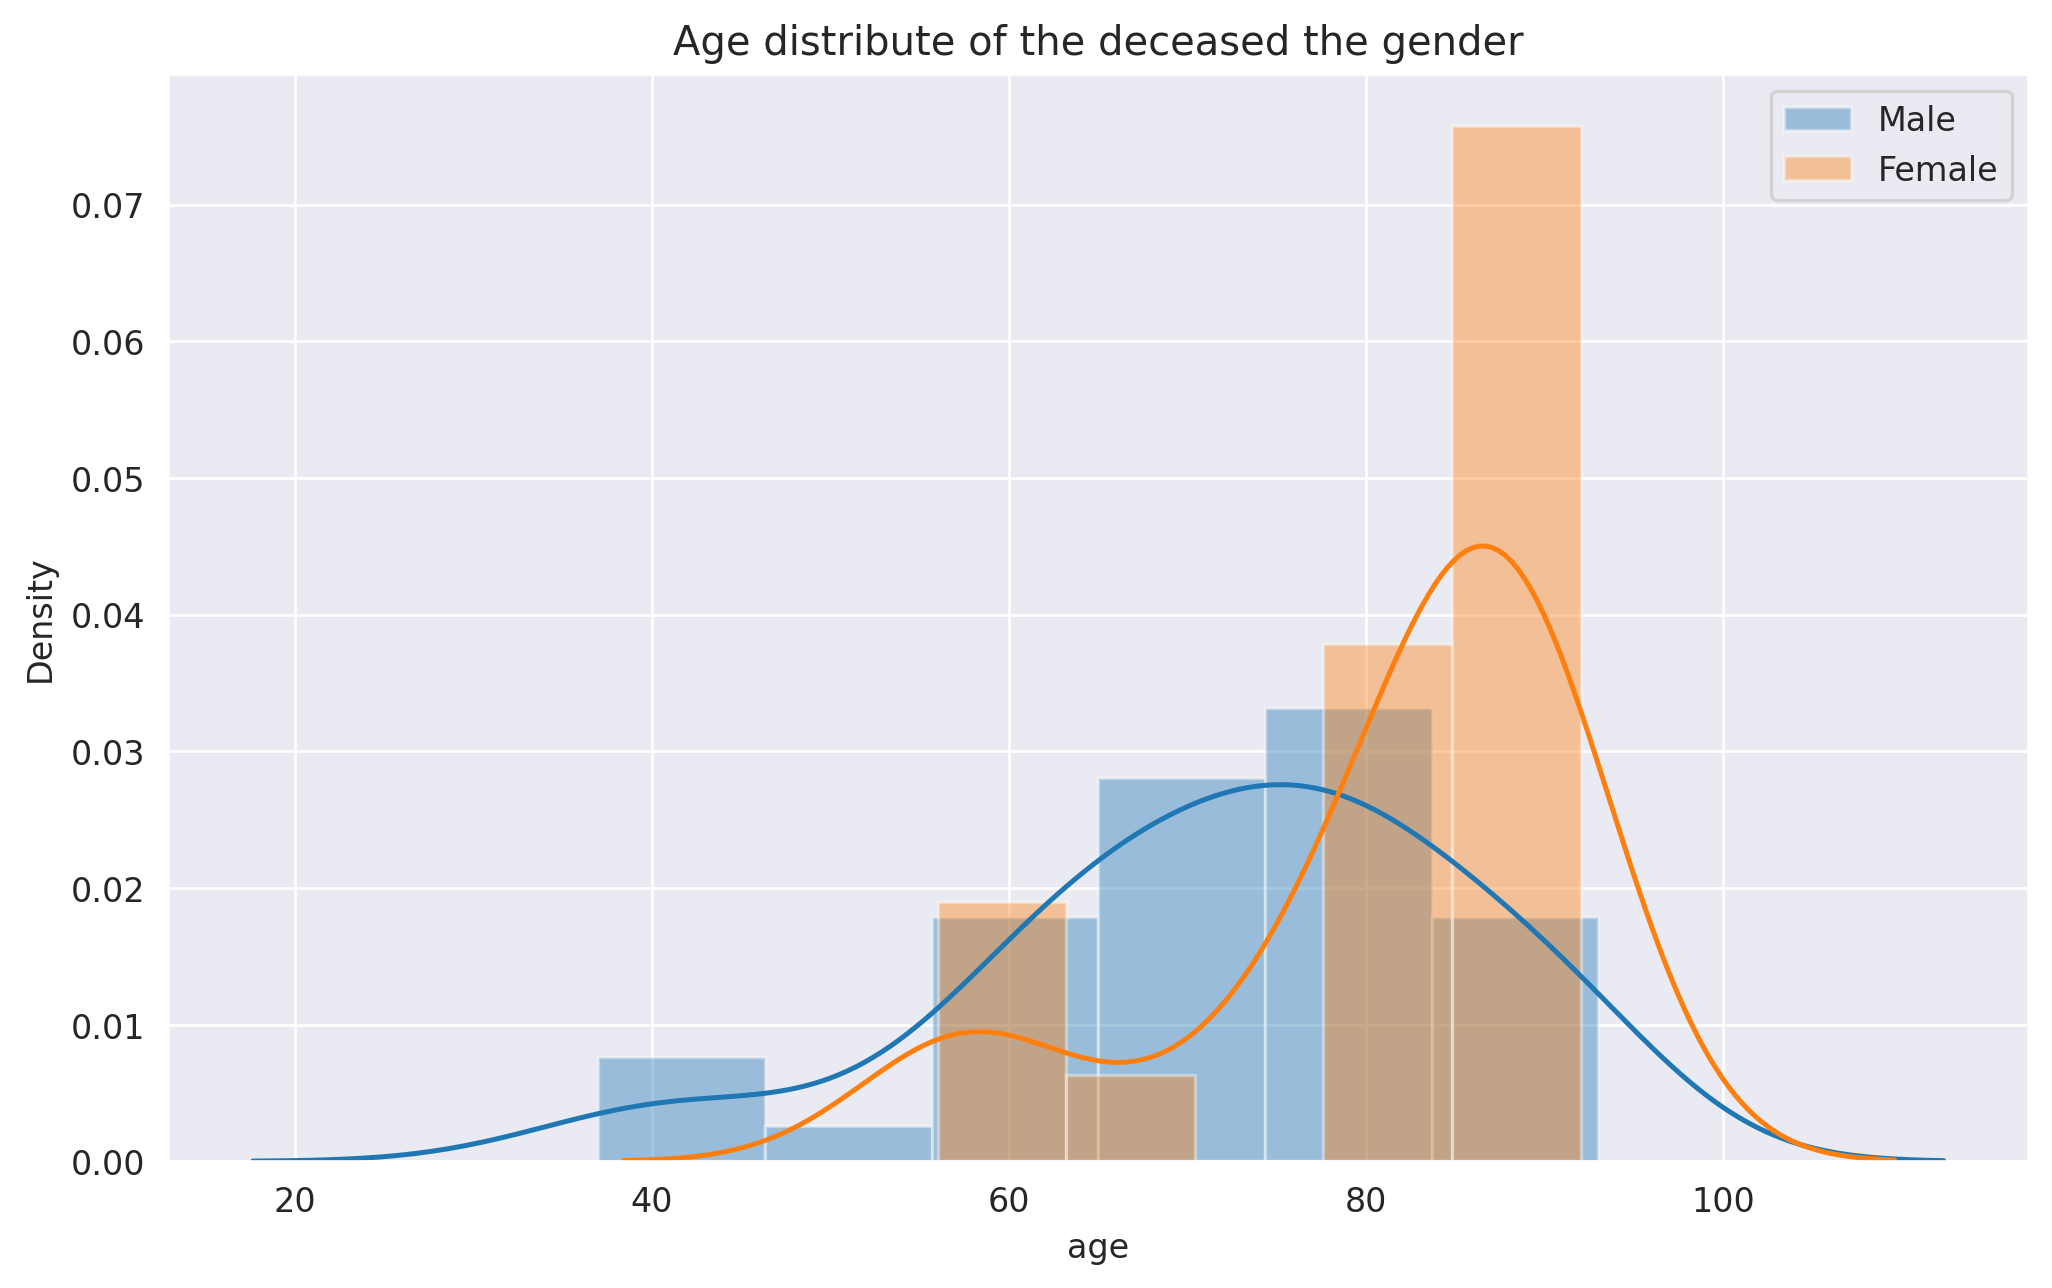

In [66]:
# 성별에 따른 사망자의 연령 분포
plt.figure(figsize = (10, 6), dpi = 120)
sns.set_style('darkgrid')
plt.title('Age distribute of the deceased the gender')
sns.distplot(a = male_dead['age'], label = 'Male', kde = True)
sns.distplot(a = female_dead['age'], label = 'Female', kde = True)
plt.legend()

사망자 성별 비교 -> 바차트, 파이차트 -> 분포

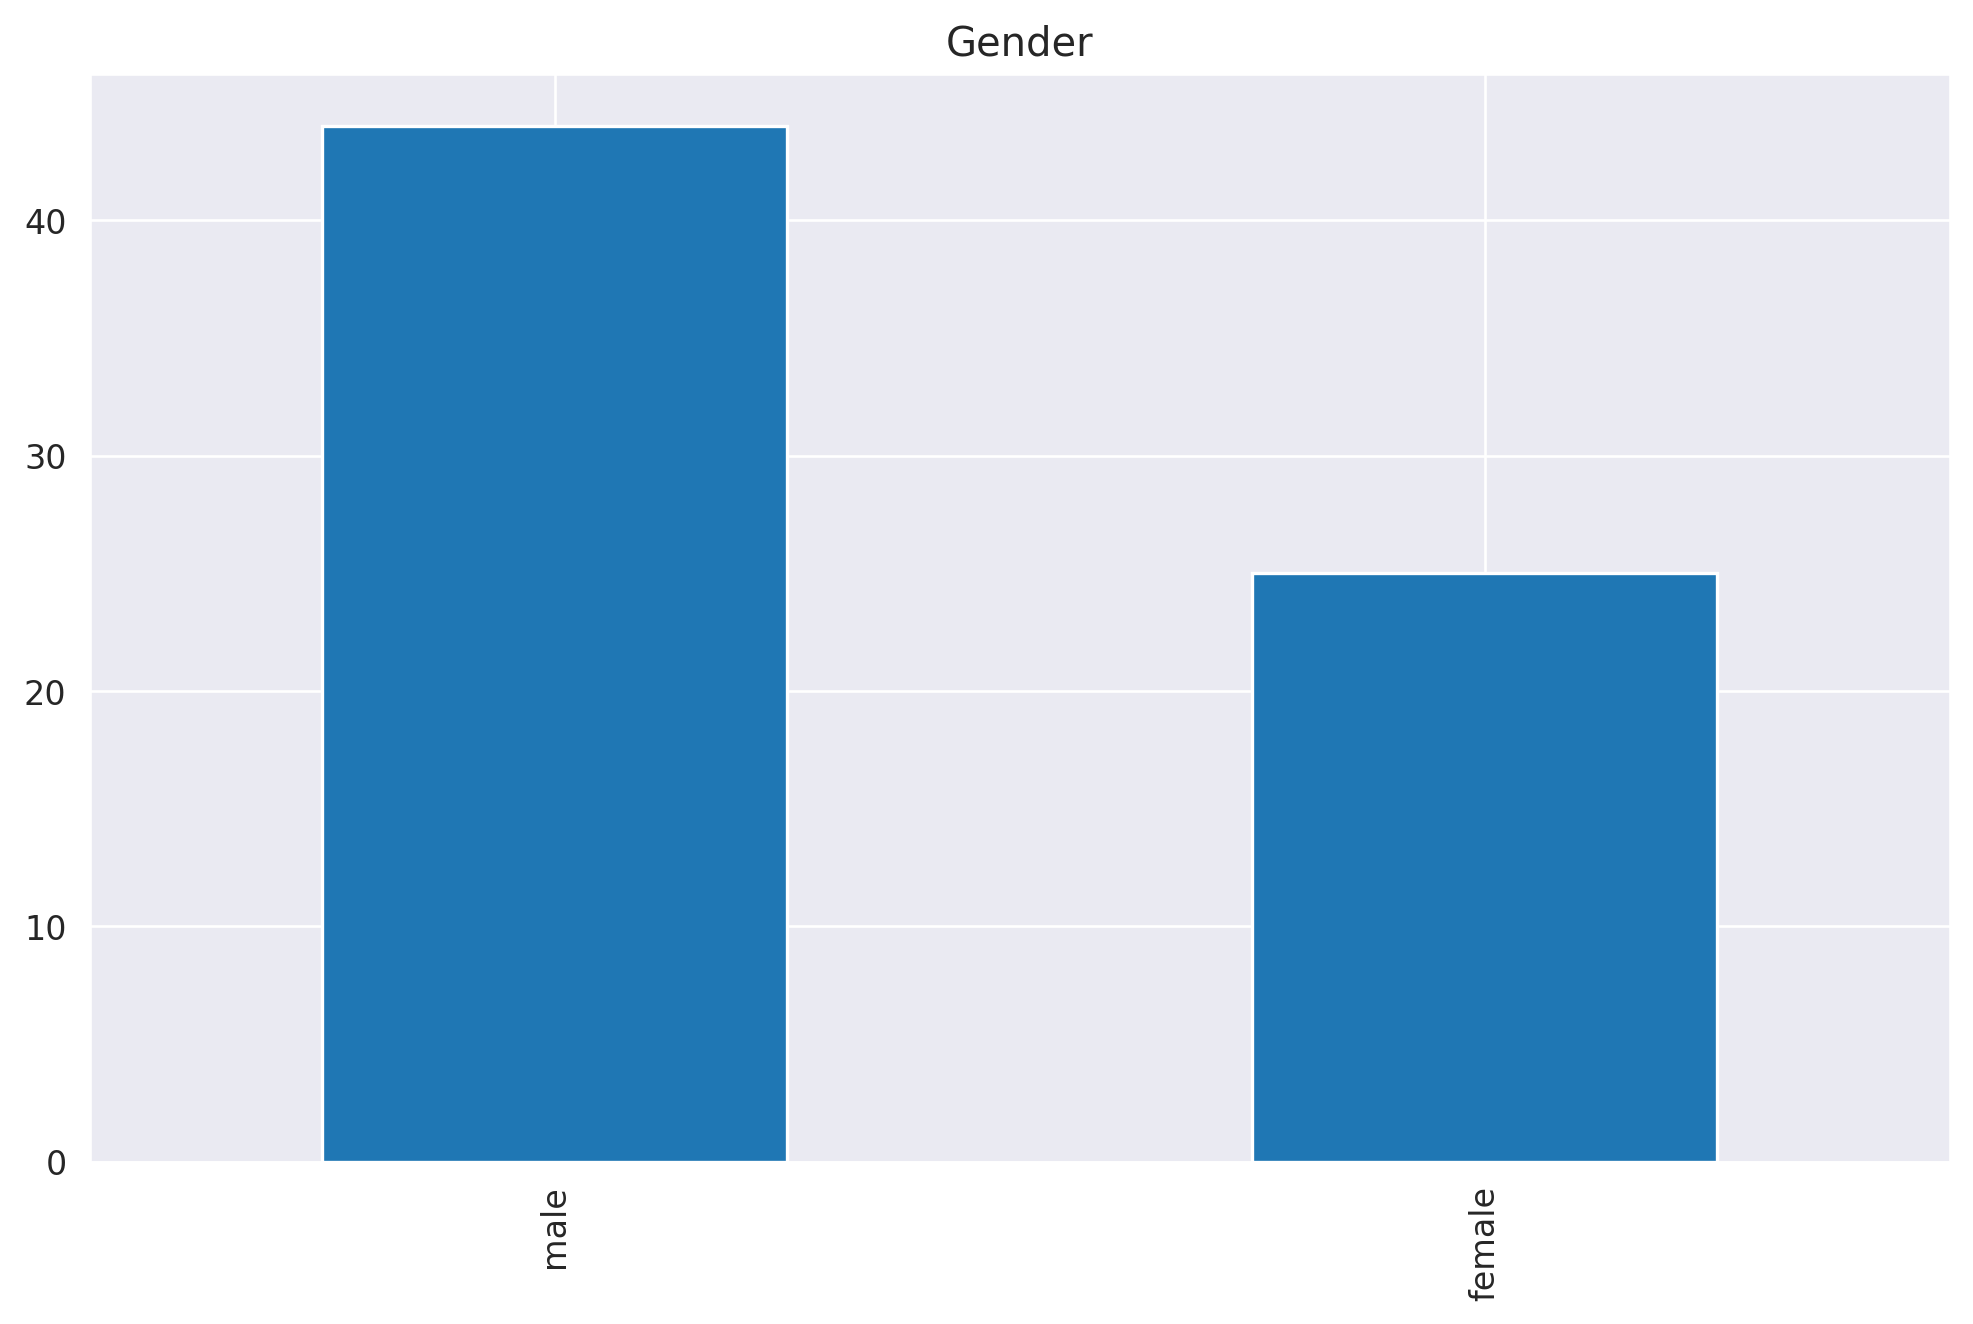

In [67]:
plt.figure(figsize = (10, 6), dpi = 120)
plt.title('Gender')
dead_state.gender.value_counts().plot.bar()

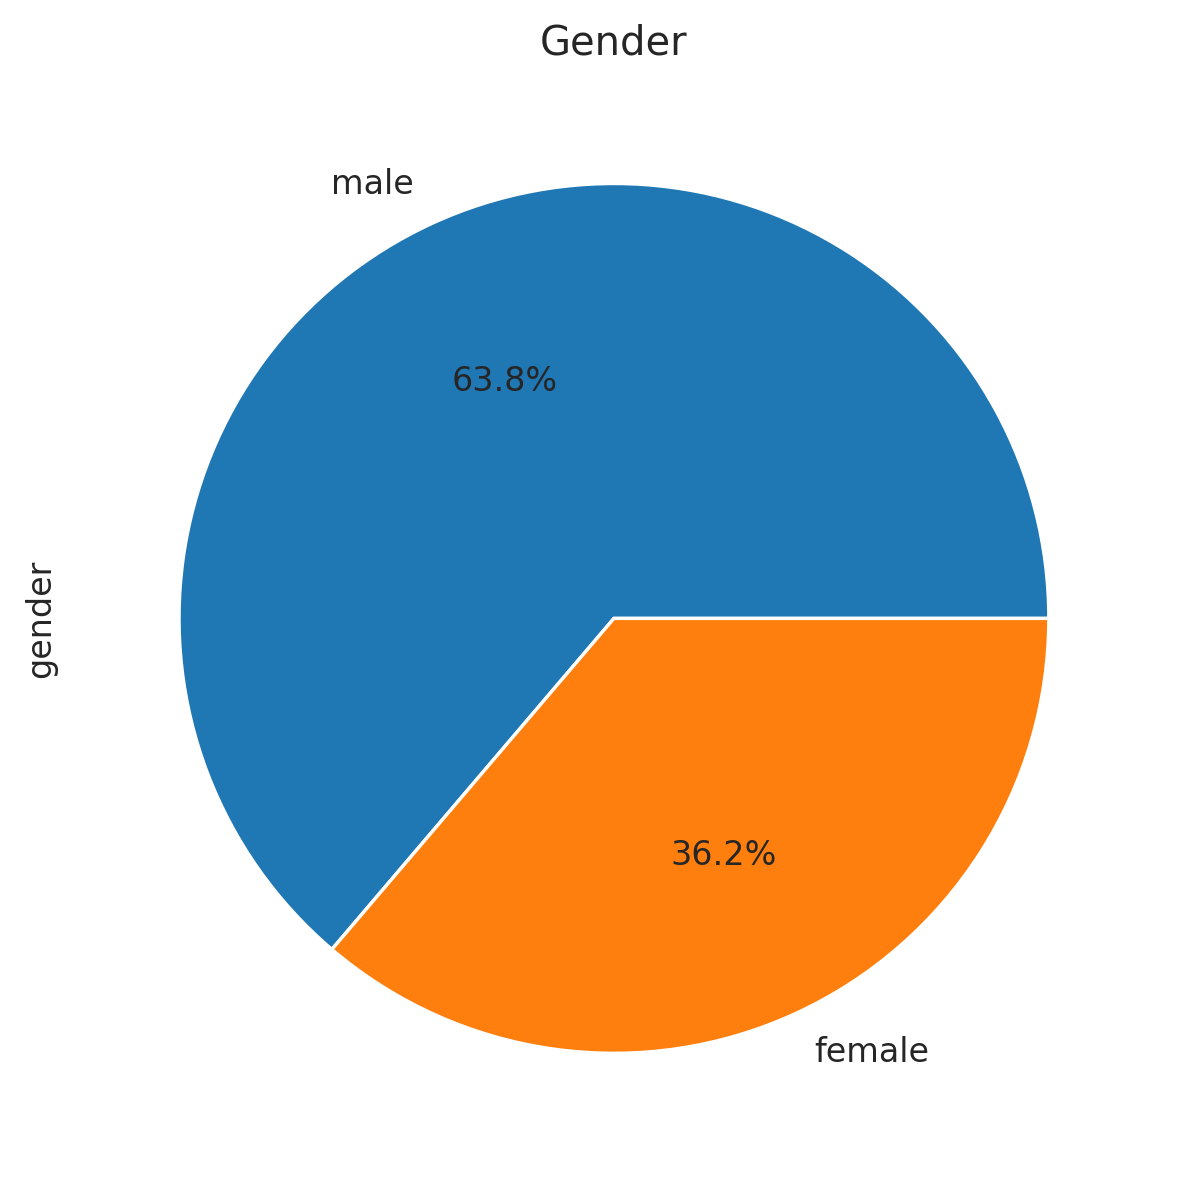

In [70]:
plt.figure(figsize = (10, 6), dpi = 120)
plt.title('Gender')
dead_state.gender.value_counts().plot.pie(autopct = '%.1f%%')

환자 유형별 (격리해제자, 격리중인 환자, 사망자) 연령 분포

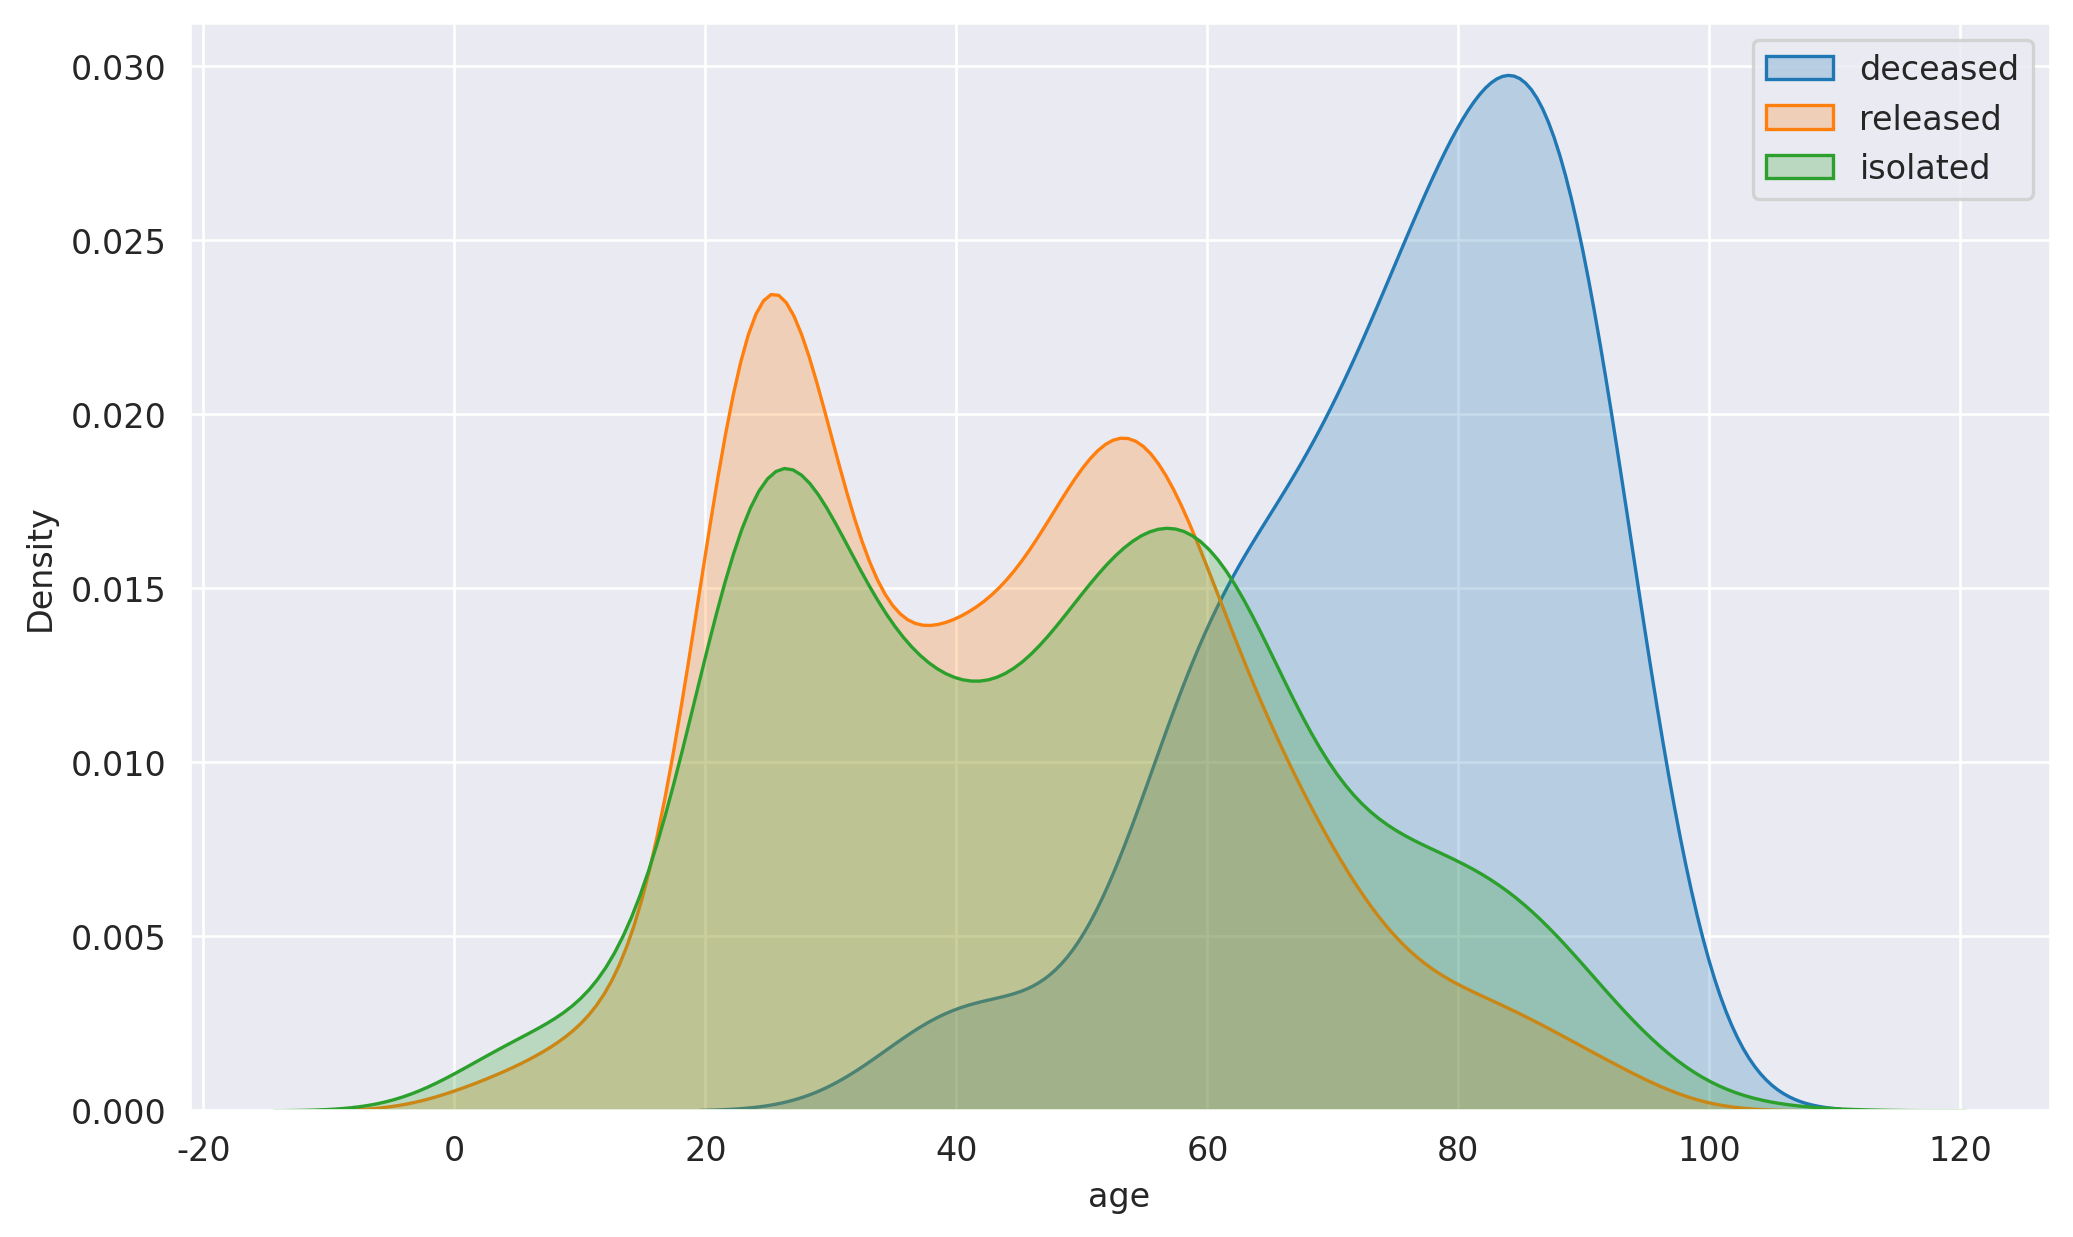

In [76]:
# 성별에 따른 사망자의 연령 분포
plt.figure(figsize = (10, 6), dpi = 120)
sns.set_style('darkgrid')
sns.kdeplot(data = dead_state['age'], label = 'deceased', shade = True)
sns.kdeplot(data = released_state['age'], label = 'released', shade = True)
sns.kdeplot(data = isolated_state['age'], label = 'isolated', shade = True)
plt.legend()

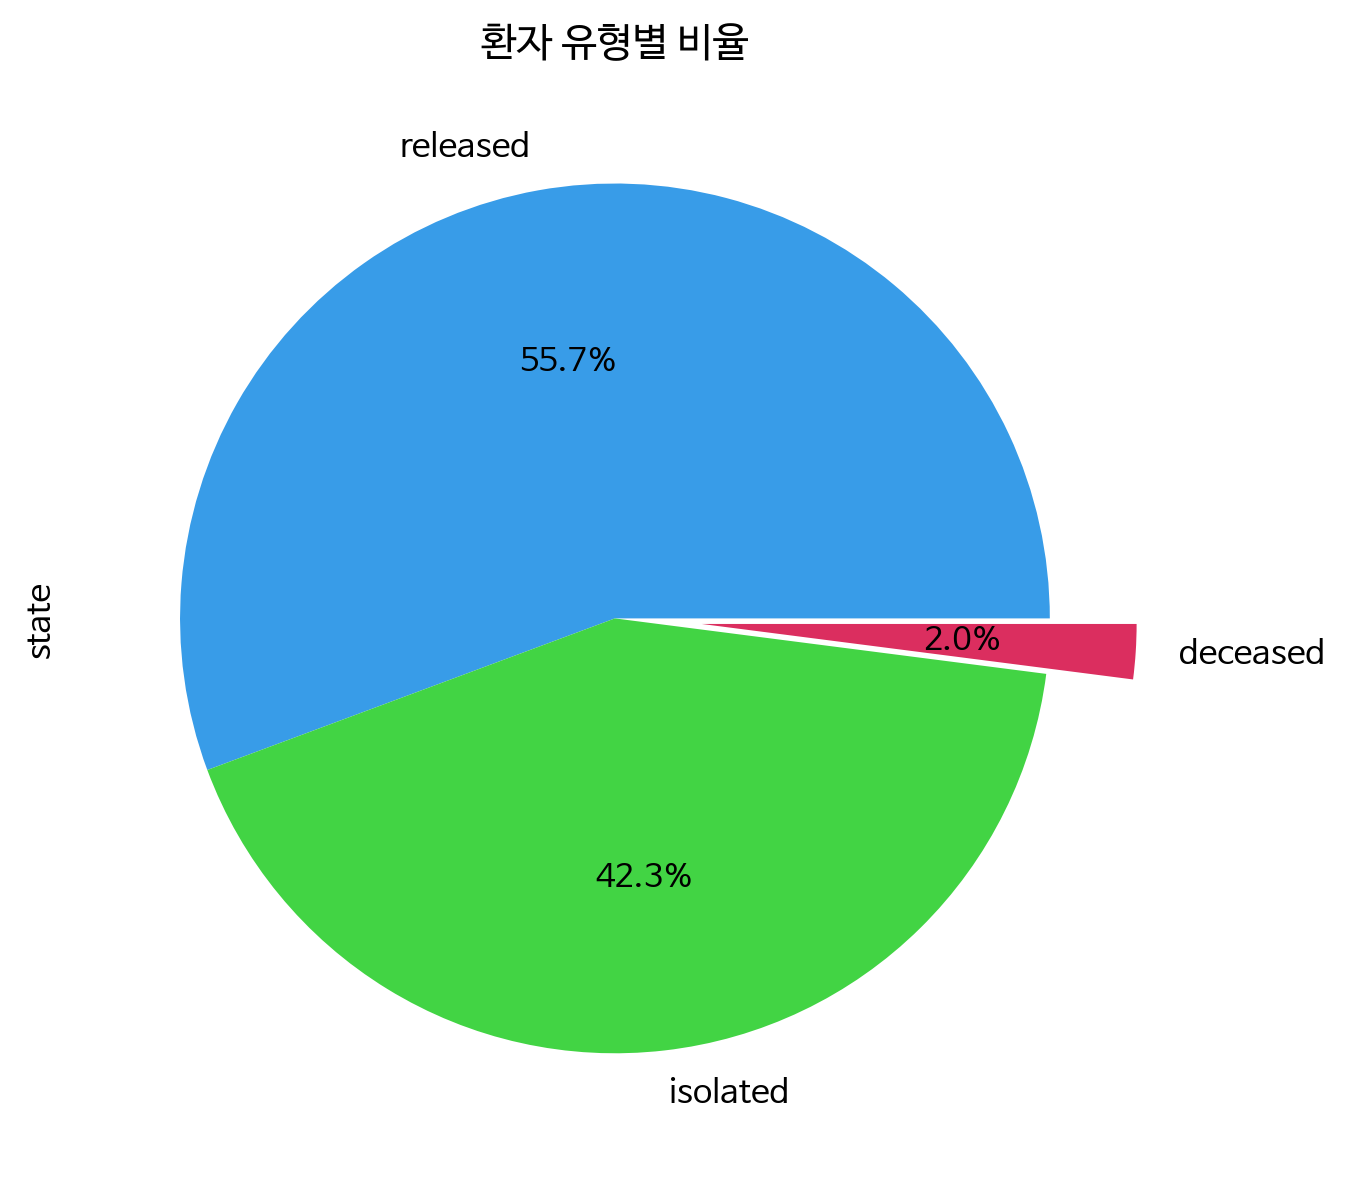

In [67]:
plt.figure(figsize = (10, 6), dpi = 120)
plt.title('환자 유형별 비율')
color = ['#389ce8', '#42d444', '#db2e5f']
df_patient.state.value_counts().plot.pie(explode = (0, 0, 0.2), colors = color, autopct = '%.1f%%')

In [72]:
# 성별, 날짜별 사망자 수 꺾은선 그래프
# plt.figure(figsize = (10, 6), dpi = 120)
# plt.title('환자 유형별 비율')
print(df_patient.groupby(['confirmed_date', 'gender'])['gender'].count())

confirmed_date  gender
2020-01-20      female    1
2020-01-23      male      1
2020-01-26      male      1
2020-01-27      male      1
2020-01-30      male      3
                         ..
2020-04-27      female    2
                male      1
2020-04-28      female    1
                male      2
2020-04-29      female    1
Name: gender, Length: 163, dtype: int64


In [41]:
df_patient.groupby(['confirmed_date', 'gender']).count().plot

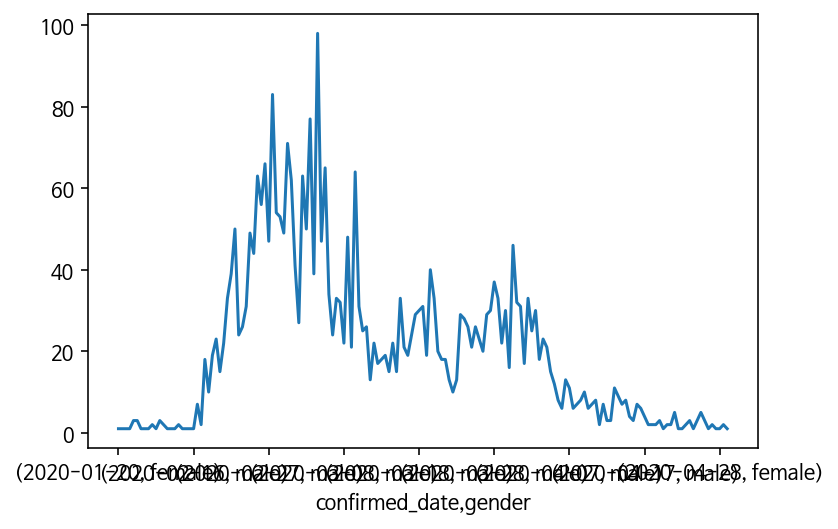

In [42]:
df_patient.groupby(['confirmed_date', 'gender'])['gender'].count().plot()

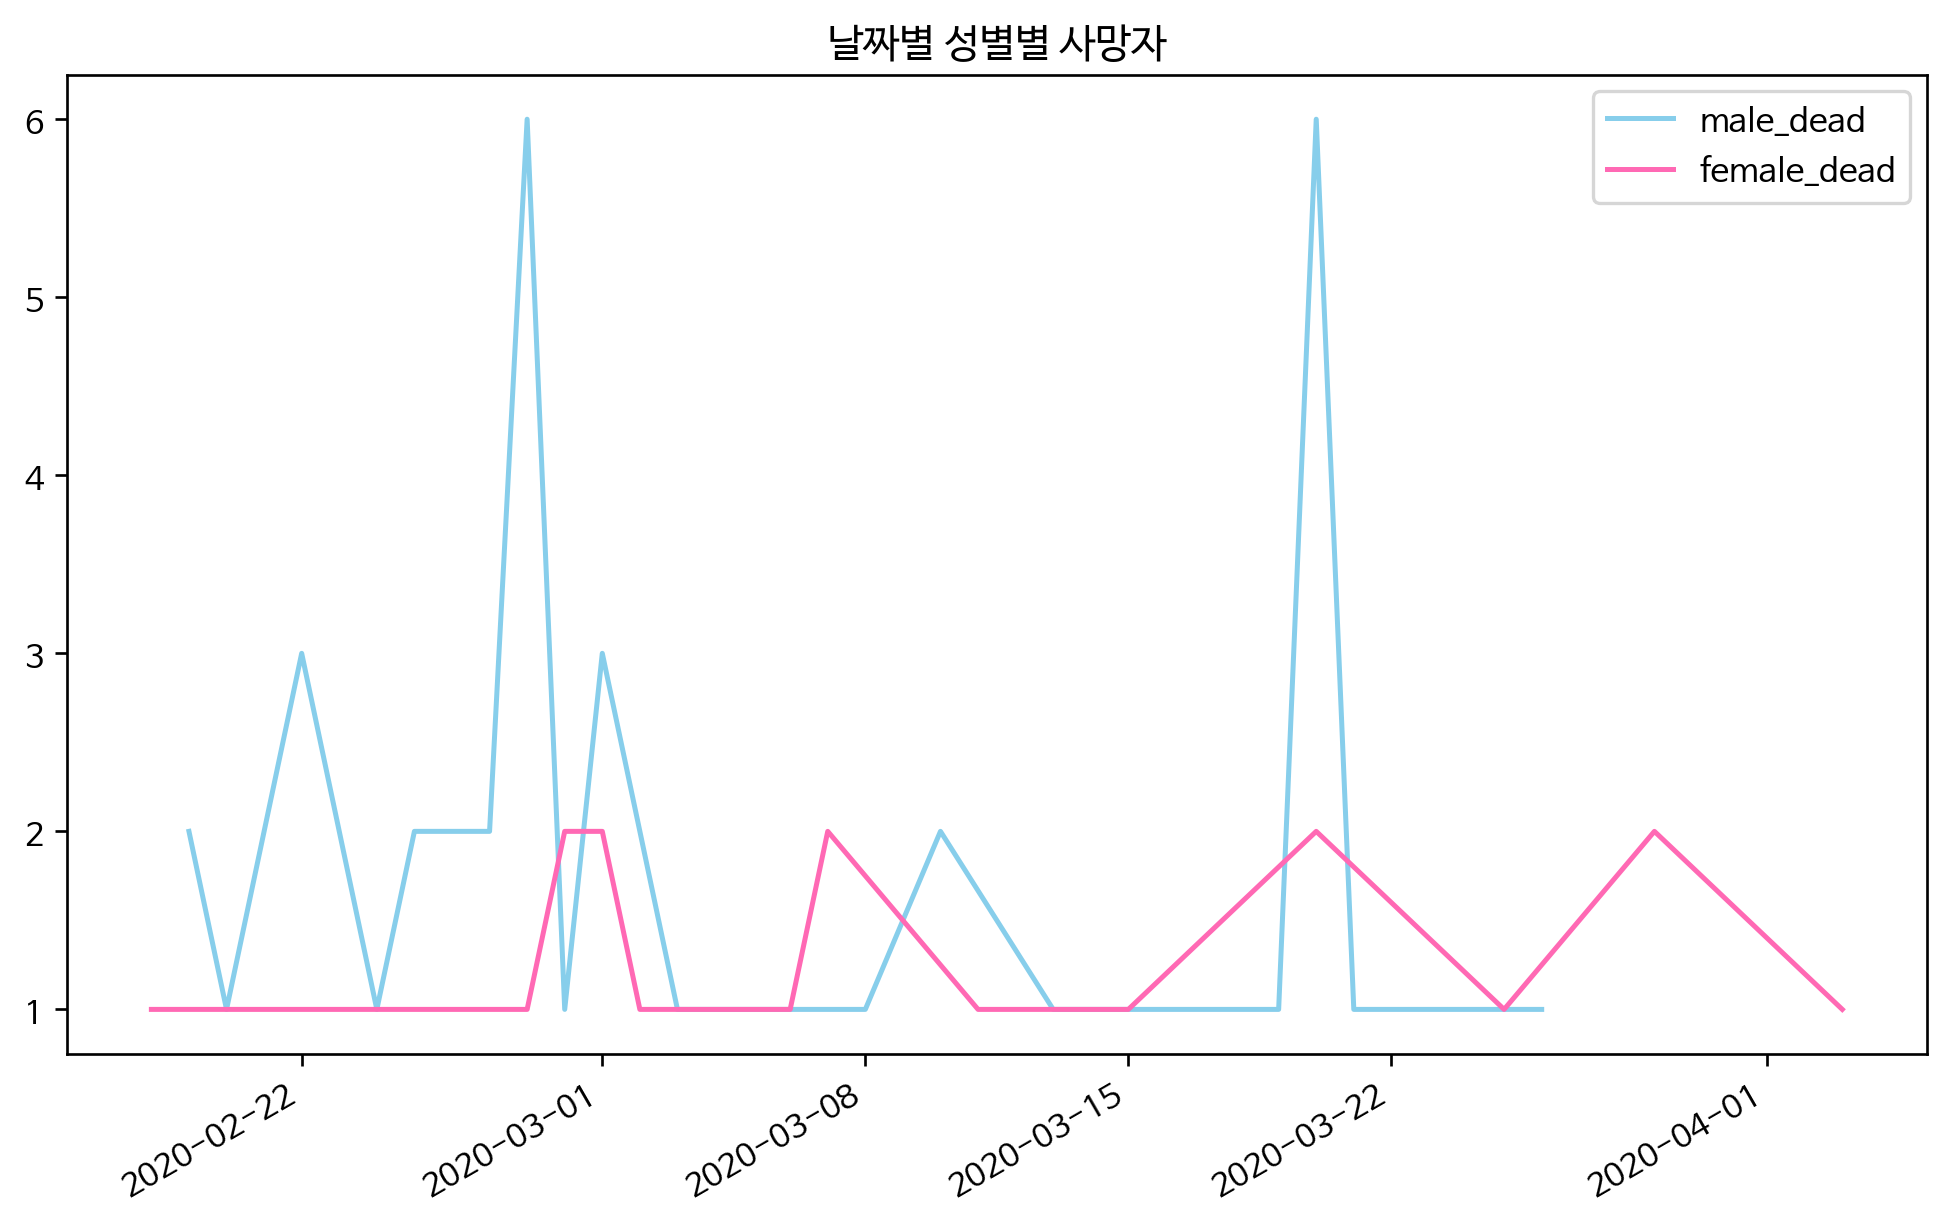

In [62]:
# 성별별 test
# dead_state = patient[patient.state=='deceased']
# male_dead = dead_state[dead_state.gender == 'male']
# female_dead = dead_state[dead_state.gender == 'female']

plt.figure(figsize = (10, 6), dpi = 120)
plt.title('날짜별 성별별 사망자')
pandas.to_datetime(male_dead.confirmed_date).value_counts().plot(color = 'skyblue', label = 'male_dead')
pandas.to_datetime(female_dead.confirmed_date).value_counts().plot(color = 'hotpink', label = 'female_dead')
plt.legend()
plt.show()

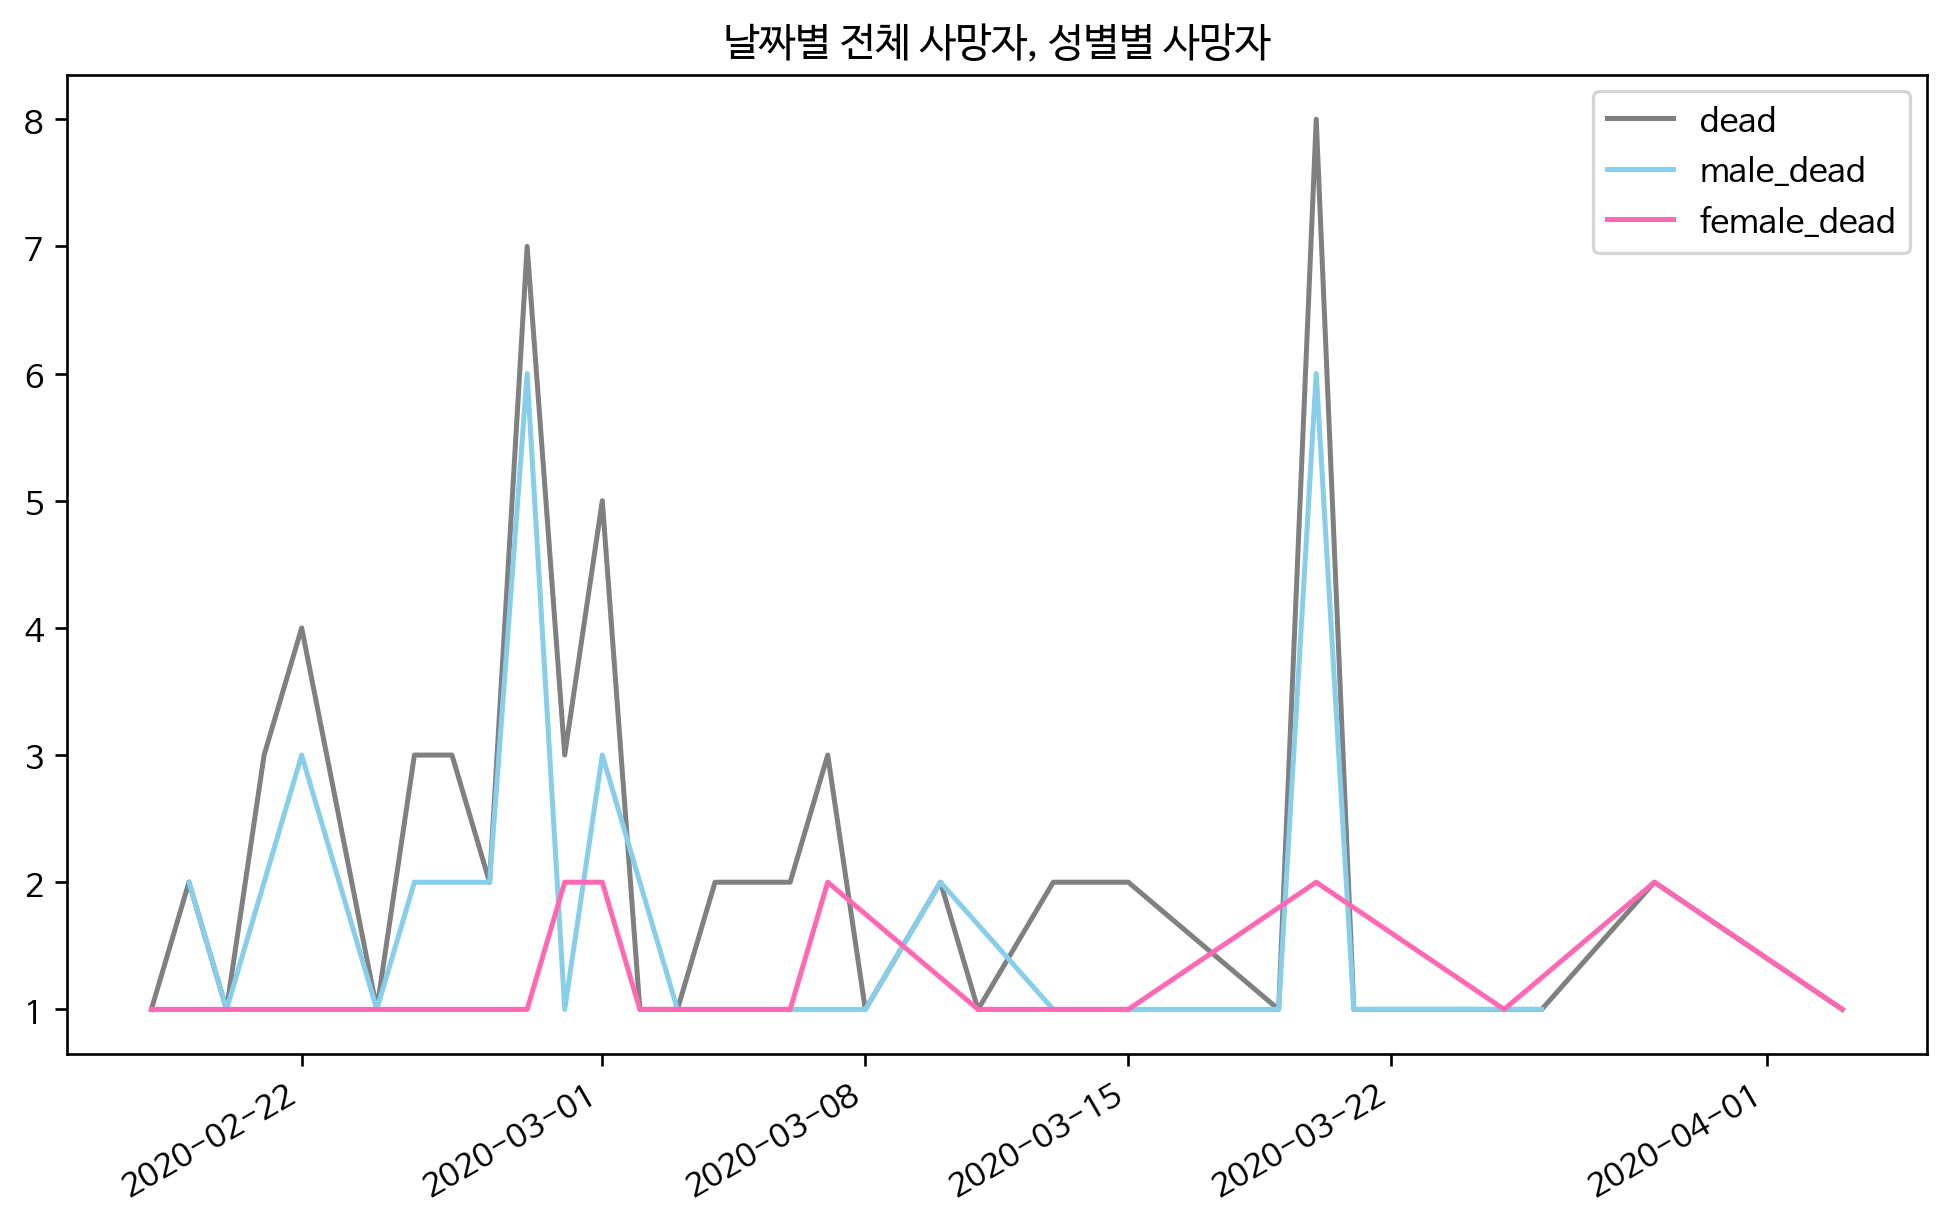

In [61]:
# 성별별 test
# dead_state = patient[patient.state=='deceased']
# male_dead = dead_state[dead_state.gender == 'male']
# female_dead = dead_state[dead_state.gender == 'female']

plt.figure(figsize = (10, 6), dpi = 120)
plt.title('날짜별 전체 사망자, 성별별 사망자')
pandas.to_datetime(dead_state.confirmed_date).value_counts().plot(color = 'gray', label = 'dead')
pandas.to_datetime(male_dead.confirmed_date).value_counts().plot(color = 'skyblue', label = 'male_dead')
pandas.to_datetime(female_dead.confirmed_date).value_counts().plot(color = 'hotpink', label = 'female_dead')
plt.legend()
plt.show()